In [1]:
from datetime import datetime as dt
import unicodedata
import pandas as pd
import numpy as np

In [2]:
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

import string
from nltk.corpus import stopwords

## Embeddings

We have our data split into monthly data. Now, we compare the embeddings from January 2020 and July 2020.

### Import Data

In [3]:
jan = pd.read_csv('months/jan.csv', lineterminator='\n')
feb = pd.read_csv('months/feb.csv', lineterminator='\n')
mar = pd.read_csv('months/mar.csv', lineterminator='\n')
apr = pd.read_csv('months/apr.csv', lineterminator='\n')
may = pd.read_csv('months/may.csv', lineterminator='\n')
june = pd.read_csv('months/june.csv', lineterminator='\n')
july = pd.read_csv('months/july.csv', lineterminator='\n')

In [4]:
jan.shape, feb.shape, mar.shape, apr.shape, may.shape, june.shape, july.shape

((21102, 5),
 (72057, 5),
 (356982, 5),
 (421719, 5),
 (312505, 5),
 (245143, 5),
 (243827, 5))

We see that we have varying data sizes with February having the largest dataset. To avoid having skewed results due to differing sizes, we take a random sample of the lowest amount of data from each sample. We can see that January has the least amount of data so that is the size we will extract from each month.

In [5]:
n = jan.shape[0]
n

21102

### Resampling Data

In [6]:
feb = feb.sample(n=n, replace=False, random_state=1)
mar = mar.sample(n=n, replace=False, random_state=1)
apr = apr.sample(n=n, replace=False, random_state=1)
may = may.sample(n=n, replace=False, random_state=1)
june = june.sample(n=n, replace=False, random_state=1)
july = july.sample(n=n, replace=False, random_state=1)

### Text Cleaning

First, let's remove all stop words and punctuation from the sentences. Then we will get our embeddings.

In [7]:
stop = set(stopwords.words('english'))
all_stops = stop | set(string.punctuation)

In [8]:
def clean_tokens(sentence):
    temp = []
    for word in word_tokenize(sentence):
        if word not in all_stops:
            temp.append(word.lower())
    return temp

In [10]:
# Tokens
jan_tokens = jan.body.apply(clean_tokens)
feb_tokens = feb.body.apply(clean_tokens)
mar_tokens = mar.body.apply(clean_tokens)
apr_tokens = apr.body.apply(clean_tokens)
may_tokens = may.body.apply(clean_tokens)
june_tokens = june.body.apply(clean_tokens)
july_tokens = july.body.apply(clean_tokens)

In [11]:
jan_tokens.shape, may_tokens.shape, july_tokens.shape

((21102,), (21102,), (21102,))

In [12]:
len(np.concatenate(jan_tokens.values, axis=0))

6046666

We see that for January we have over 6 million tokens.

### Word2Vec Models

We build a word2vec model for January through July tokens to get the embeddings.

In [13]:
# Create a word2vec model for each month
jan_model = gensim.models.Word2Vec(jan_tokens, min_count = 3, window = 5, sg=1) 
feb_model = gensim.models.Word2Vec(feb_tokens, min_count = 3, window = 5, sg=1) 
mar_model = gensim.models.Word2Vec(mar_tokens, min_count = 3, window = 5, sg=1) 
apr_model = gensim.models.Word2Vec(apr_tokens, min_count = 3, window = 5, sg=1) 
may_model = gensim.models.Word2Vec(may_tokens, min_count = 3, window = 5, sg=1) 
june_model = gensim.models.Word2Vec(june_tokens, min_count = 3, window = 5, sg=1) 
july_model = gensim.models.Word2Vec(july_tokens, min_count = 3, window = 5, sg=1)

In [14]:
# Test out embedding on one word
jan_model.wv['apple']

array([ 8.07708383e-01,  4.11017746e-01,  1.21743478e-01, -2.69929677e-01,
        2.11442545e-01, -1.06397176e+00,  5.58654547e-01,  7.18077719e-01,
        3.94378155e-01,  2.17337891e-01,  3.08701724e-01, -2.86516100e-01,
       -8.05128217e-02, -6.23122036e-01,  8.69856253e-02, -5.65727949e-01,
       -4.53347802e-01,  2.29740784e-01,  1.18969776e-01, -8.94399732e-02,
       -3.75542343e-02,  7.36617208e-01,  1.16296327e+00, -5.79378963e-01,
       -4.84360099e-01,  4.61392581e-01, -9.87474248e-02, -1.16173588e-02,
       -6.68823004e-01,  6.23043716e-01,  4.73286599e-01,  1.93691283e-01,
        6.85491085e-01,  1.81182921e-01, -1.08659200e-01, -1.90627426e-01,
        6.34765506e-01, -3.38993728e-01, -2.85096616e-01, -3.51861447e-01,
       -8.17764759e-01, -4.25170064e-01,  3.25135678e-01,  9.82128084e-02,
       -7.52950534e-02, -2.96986312e-01, -3.52532297e-01,  1.89445809e-01,
       -7.37787843e-01, -6.84579611e-01, -3.03379521e-02, -5.34071703e-04,
       -2.76190490e-01, -

In [15]:
# Save the embedding models
jan_model.save('models/jan_model.model')
feb_model.save('models/feb_model.model')
mar_model.save('models/mar_model.model')
apr_model.save('models/apr_model.model')
may_model.save('models/may_model.model')
june_model.save('models/june_model.model')
july_model.save('models/july_model.model')

We save our embedding models so that we can load them in again in the future.

## Group Word Lists 

We need to get word lists for both Asian and White names so that we can separate the two from the articles. We get this information from _Word Embeddings Quantify 100 Years of Gender and Ethnic Stereotypes_.

In [16]:
white_last_names = ['harris', 'nelson', 'robinson', 'thompson', 'moore', 'wright', 'anderson', 'clark', 'jackson', 'taylor', 'scott', 'davis',
'allen', 'adams', 'lewis', 'williams', 'jones', 'wilson', 'martin', 'johnson']

len(white_last_names)

20

In [17]:
chinese_last_names = ['chung', 'liu', 'wong', 'huang', 'ng','hu', 'chu', 'chen', 'lin', 'liang', 'wang', 'wu', 'yang', 'tang', 'chang', 'hong', 'li']
asian_last_names = ['cho', 'wong', 'tang', 'huang', 'chu', 'chung', 'ng', 'wu', 'liu', 'chen', 'lin', 'yang', 'kim', 'chang', 'shah', 'wang', 'li', 'khan',
'singh', 'hong'] + chinese_last_names

# Get unique last names to avoid any repeats
asian_last_names = np.unique(np.array(asian_last_names))

asian_last_names.shape

(22,)

We have 20 White last names and 22 Asian last names.

**White Last Names**

In [18]:
# Get embedding for every word
whiteEmb_jan = np.array([jan_model.wv[name] for name in white_last_names])
whiteEmb_feb = np.array([feb_model.wv[name] for name in white_last_names])
whiteEmb_mar = np.array([mar_model.wv[name] for name in white_last_names])
whiteEmb_apr = np.array([apr_model.wv[name] for name in white_last_names])
whiteEmb_may = np.array([may_model.wv[name] for name in white_last_names])
whiteEmb_june = np.array([june_model.wv[name] for name in white_last_names])
whiteEmb_july = np.array([july_model.wv[name] for name in white_last_names])

whiteEmb_jan.shape

(20, 100)

Then, we repeat this process with Asian last names.

**Asian Last Names**

In [19]:
# Get embedding for every word
asianEmb_jan = np.array([jan_model.wv[name] for name in asian_last_names])
asianEmb_feb = np.array([feb_model.wv[name] for name in asian_last_names])
asianEmb_mar = np.array([mar_model.wv[name] for name in asian_last_names])
asianEmb_apr = np.array([apr_model.wv[name] for name in asian_last_names])
asianEmb_may = np.array([may_model.wv[name] for name in asian_last_names])
asianEmb_june = np.array([june_model.wv[name] for name in asian_last_names])
asianEmb_july = np.array([july_model.wv[name] for name in asian_last_names])

asianEmb_jan.shape

(22, 100)

## Other Word Lists

From reading articles and the following papers, the following categories for word lists have been created. We will be quantifying the association between Asians (relative to Whites) for:
1. COVID-19 related terms
2. Hate Crime related terms
3. Outsider Adjectives
4. General list of adjectives

The first three will be used to determine if they follow global events, i.e. reports from news articles and papers on the effects of COVID-19 in. The latter will then be used with a sentiment analysis to determine if more negative adjectives are being associated with Asians vs. Whites if time persists. 

We read these word lists in from a self-created CSV file. We get oustider adjectives from [1] and the extra larger adjective list from (paper i did my paper pres on or extratrait.csv from [2]????

https://www.pbs.org/newshour/nation/asian-americans-describe-gut-punch-of-racist-attacks-during-coronavirus-pandemic
https://www.frontiersin.org/articles/10.3389/fcomm.2020.00039/full

In [21]:
word_lists = pd.read_csv('data/wordlists.csv')
word_lists.head()

,covid,hate_crime,outsider
0,coronavirus,harassment,devious
1,virus,assault,bizarre
2,covid,murder,venomous
3,flu,arson,erratic
4,bat,vandalism,barbaric


In [22]:
covid = word_lists.covid.values
hate_crime = word_lists.hate_crime.values
outsider = word_lists.outsider.values

First, we want to determine words that are present in all of the months as these are the only embeddings that we can compare over time.

**Check which words are in all of the months**

In [23]:
jan_words = jan_model.wv.key_to_index
feb_words = feb_model.wv.key_to_index
mar_words = mar_model.wv.key_to_index
apr_words = apr_model.wv.key_to_index
may_words = may_model.wv.key_to_index
june_words = june_model.wv.key_to_index
july_words = july_model.wv.key_to_index

In [24]:
def check_words(lst):
    final_lst = []
    for word in lst:
        if (word in jan_words) & (word in feb_words) & (word in mar_words) & (word in apr_words) & (word in may_words) & (word in june_words) & (word in july_words):
            final_lst.append(word)
    return final_lst

In [25]:
covid_lst = check_words(covid)
hate_lst = check_words(hate_crime)
outsider_lst = check_words(outsider)

In [26]:
print(covid_lst)
print(hate_lst)
print(outsider_lst)

['coronavirus', 'virus', 'flu', 'bat', 'sick', 'disease', 'infectious', 'contagious']
['assault', 'murder', 'arson', 'vandalism', 'threats', 'hate', 'spitting', 'attack']
['bizarre', 'erratic', 'frightening', 'forceful', 'deceptive', 'greedy', 'hateful', 'brutal', 'monstrous', 'calculating', 'cruel', 'aggressive', 'monstrous']


In [27]:
len(covid_lst), len(hate_lst), len(outsider_lst)

(8, 8, 13)

These are the words that appear in every month of data. Next, we get the embeddings for each of these words.

## Embeddings

In [28]:
def get_embeddings(lst, model):
    emb_lst = []
    for word in lst:
        embs = []
        emb = model.wv[word]
        emb_lst.append(emb)
    return emb_lst

**COVID**

In [29]:
# January
covidEmb_jan = np.array(get_embeddings(covid_lst, jan_model))
hateEmb_jan = np.array(get_embeddings(hate_lst, jan_model))
outsiderEmb_jan = np.array(get_embeddings(outsider_lst, jan_model))

# February
covidEmb_feb = np.array(get_embeddings(covid_lst, feb_model))
hateEmb_feb = np.array(get_embeddings(hate_lst, feb_model))
outsiderEmb_feb = np.array(get_embeddings(outsider_lst, feb_model))

# March
covidEmb_mar = np.array(get_embeddings(covid_lst, mar_model))
hateEmb_mar = np.array(get_embeddings(hate_lst, mar_model))
outsiderEmb_mar = np.array(get_embeddings(outsider_lst, mar_model))

# April
covidEmb_apr = np.array(get_embeddings(covid_lst, apr_model))
hateEmb_apr = np.array(get_embeddings(hate_lst, apr_model))
outsiderEmb_apr = np.array(get_embeddings(outsider_lst, apr_model))

# May
covidEmb_may = np.array(get_embeddings(covid_lst, may_model))
hateEmb_may = np.array(get_embeddings(hate_lst, may_model))
outsiderEmb_may = np.array(get_embeddings(outsider_lst, may_model))

# June
covidEmb_june = np.array(get_embeddings(covid_lst, june_model))
hateEmb_june = np.array(get_embeddings(hate_lst, june_model))
outsiderEmb_june = np.array(get_embeddings(outsider_lst, june_model))

# July
covidEmb_july = np.array(get_embeddings(covid_lst, july_model))
hateEmb_july = np.array(get_embeddings(hate_lst, july_model))
outsiderEmb_july = np.array(get_embeddings(outsider_lst, july_model))

We then want to get the group representational vectors for each category for each month.

In [30]:
# January
covidGroup_jan = np.mean(covidEmb_jan, axis=0)
hateGroup_jan = np.mean(hateEmb_jan, axis=0)
outsiderGroup_jan = np.mean(outsiderEmb_jan, axis=0)

# February
covidGroup_feb = np.mean(covidEmb_feb, axis=0)
hateGroup_feb = np.mean(hateEmb_feb, axis=0)
outsiderGroup_feb = np.mean(outsiderEmb_feb, axis=0)

# March
covidGroup_mar = np.mean(covidEmb_mar, axis=0)
hateGroup_mar = np.mean(hateEmb_mar, axis=0)
outsiderGroup_mar = np.mean(outsiderEmb_mar, axis=0)

# April
covidGroup_apr = np.mean(covidEmb_apr, axis=0)
hateGroup_apr = np.mean(hateEmb_apr, axis=0)
outsiderGroup_apr = np.mean(outsiderEmb_apr, axis=0)

# May
covidGroup_may = np.mean(covidEmb_may, axis=0)
hateGroup_may = np.mean(hateEmb_may, axis=0)
outsiderGroup_may = np.mean(outsiderEmb_may, axis=0)

# June
covidGroup_june = np.mean(covidEmb_june, axis=0)
hateGroup_june = np.mean(hateEmb_june, axis=0)
outsiderGroup_june = np.mean(outsiderEmb_june, axis=0)

# July
covidGroup_july = np.mean(covidEmb_july, axis=0)
hateGroup_july = np.mean(hateEmb_july, axis=0)
outsiderGroup_july = np.mean(outsiderEmb_july, axis=0)

## Embedding Similarity
Now, for each of these words, we can compute the association with the Asian and White last names and the generalized category vectors.

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

### COVID

In [32]:
# Bias with Asian vector
covidAsian_jan = np.linalg.norm(covidGroup_jan - asianEmb_jan, axis=1)
covidAsian_feb = np.linalg.norm(covidGroup_feb - asianEmb_feb, axis=1)
covidAsian_mar = np.linalg.norm(covidGroup_mar - asianEmb_mar, axis=1)
covidAsian_apr = np.linalg.norm(covidGroup_apr - asianEmb_apr, axis=1)
covidAsian_may = np.linalg.norm(covidGroup_may - asianEmb_may, axis=1)
covidAsian_june = np.linalg.norm(covidGroup_june - asianEmb_june, axis=1)
covidAsian_july = np.linalg.norm(covidGroup_july - asianEmb_july, axis=1)

In [33]:
covidAsian = np.array([covidAsian_jan, covidAsian_feb, covidAsian_mar, covidAsian_apr, covidAsian_may, 
                       covidAsian_june, covidAsian_july])

In [34]:
# Average similarity 
np.mean(covidAsian, axis=1)

array([3.6973062, 3.6542056, 3.0730643, 3.0602493, 3.297492 , 3.3202937,
       3.4113967], dtype=float32)

In [35]:
# Deviation between months 
np.sqrt(np.var(covidAsian,axis=1))

array([0.43927357, 0.35146597, 0.5483769 , 0.69192654, 0.63943166,
       0.6402359 , 0.54009175], dtype=float32)

In [36]:
# Bias with White vector
covidWhite_jan = np.linalg.norm(covidGroup_jan - whiteEmb_jan, axis=1)
covidWhite_feb = np.linalg.norm(covidGroup_feb - whiteEmb_feb, axis=1)
covidWhite_mar = np.linalg.norm(covidGroup_mar - whiteEmb_mar, axis=1)
covidWhite_apr = np.linalg.norm(covidGroup_apr - whiteEmb_apr, axis=1)
covidWhite_may = np.linalg.norm(covidGroup_may - whiteEmb_may, axis=1)
covidWhite_june = np.linalg.norm(covidGroup_june - whiteEmb_june, axis=1)
covidWhite_july = np.linalg.norm(covidGroup_july - whiteEmb_july, axis=1)

In [37]:
covidWhite = np.array([covidWhite_jan, covidWhite_feb, covidWhite_mar, covidWhite_apr, covidWhite_may,
                       covidWhite_june, covidWhite_july])

In [38]:
# Average similarity 
np.mean(covidWhite, axis=1)

array([3.6295044, 3.7073536, 3.303163 , 3.349982 , 3.2808983, 3.4250686,
       3.4731872], dtype=float32)

In [39]:
# Deviation between months 
np.sqrt(np.var(covidWhite,axis=1))

array([0.4905333 , 0.4857202 , 0.30700192, 0.30521116, 0.27203333,
       0.2966444 , 0.3070174 ], dtype=float32)

#### Plot

In [40]:
np.mean(covidWhite, axis=1)

array([3.6295044, 3.7073536, 3.303163 , 3.349982 , 3.2808983, 3.4250686,
       3.4731872], dtype=float32)

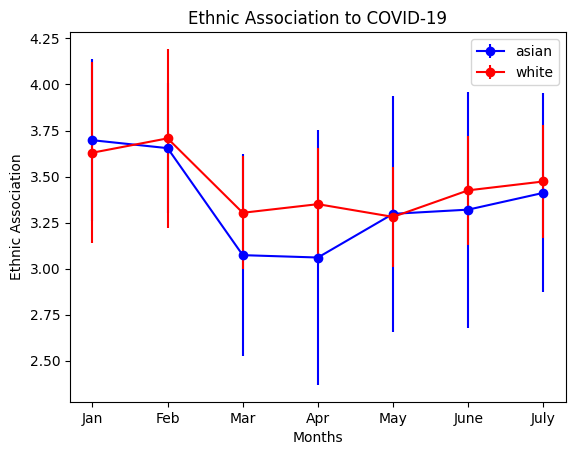

In [71]:
fig, ax = plt.subplots()

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July']

ax.errorbar(x=months, y=np.mean(covidAsian, axis=1), yerr=np.sqrt(np.var(covidAsian,axis=1)), fmt='-o', color='blue', label='asian')
ax.errorbar(x=months, y=np.mean(covidWhite, axis=1), yerr=np.sqrt(np.var(covidWhite,axis=1)), fmt='-o', color='red', label='white')

ax.set_xlabel('Months')
ax.set_ylabel('Ethnic Association')
ax.set_title('Ethnic Association to COVID-19')
ax.legend()
plt.show()

### Hate Crime

In [42]:
# Bias with Asian vector
hateAsian_jan = np.linalg.norm(hateGroup_jan - asianEmb_jan, axis=1)
hateAsian_feb = np.linalg.norm(hateGroup_feb - asianEmb_feb, axis=1)
hateAsian_mar = np.linalg.norm(hateGroup_mar - asianEmb_mar, axis=1)
hateAsian_apr = np.linalg.norm(hateGroup_apr - asianEmb_apr, axis=1)
hateAsian_may = np.linalg.norm(hateGroup_may - asianEmb_may, axis=1)
hateAsian_june = np.linalg.norm(hateGroup_june - asianEmb_june, axis=1)
hateAsian_july = np.linalg.norm(hateGroup_july - asianEmb_july, axis=1)

In [43]:
hateAsian = np.array([hateAsian_jan, hateAsian_feb, hateAsian_mar, hateAsian_apr, hateAsian_may,
                     hateAsian_june, hateAsian_july])

In [44]:
# Average similarity 
np.mean(hateAsian, axis=1)

array([3.459465 , 3.411147 , 2.7707155, 2.9311457, 3.112474 , 3.3181124,
       3.1582232], dtype=float32)

In [45]:
# Deviation between months 
np.sqrt(np.var(hateAsian,axis=1))

array([0.5606456 , 0.39627013, 0.5896709 , 0.6819716 , 0.6473034 ,
       0.6313023 , 0.5969046 ], dtype=float32)

In [46]:
# Bias with White vector
hateWhite_jan = np.linalg.norm(hateGroup_jan - whiteEmb_jan, axis=1)
hateWhite_feb = np.linalg.norm(hateGroup_feb - whiteEmb_feb, axis=1)
hateWhite_mar = np.linalg.norm(hateGroup_mar - whiteEmb_mar, axis=1)
hateWhite_apr = np.linalg.norm(hateGroup_apr - whiteEmb_apr, axis=1)
hateWhite_may = np.linalg.norm(hateGroup_may - whiteEmb_may, axis=1)
hateWhite_june = np.linalg.norm(hateGroup_june - whiteEmb_june, axis=1)
hateWhite_july = np.linalg.norm(hateGroup_july - whiteEmb_july, axis=1)

In [47]:
hateWhite = np.array([hateWhite_jan, hateWhite_feb, hateWhite_mar, hateWhite_apr, hateWhite_may,
                     hateWhite_june, hateWhite_july])

In [48]:
# Average similarity 
np.mean(hateWhite, axis=1)

array([3.2012982, 3.367232 , 3.1113322, 3.207219 , 3.09747  , 3.2693534,
       3.188354 ], dtype=float32)

In [49]:
# Deviation between months 
np.sqrt(np.var(hateWhite,axis=1))

array([0.5800524 , 0.58573425, 0.37238008, 0.34548804, 0.27469087,
       0.2833831 , 0.30699056], dtype=float32)

#### Plot

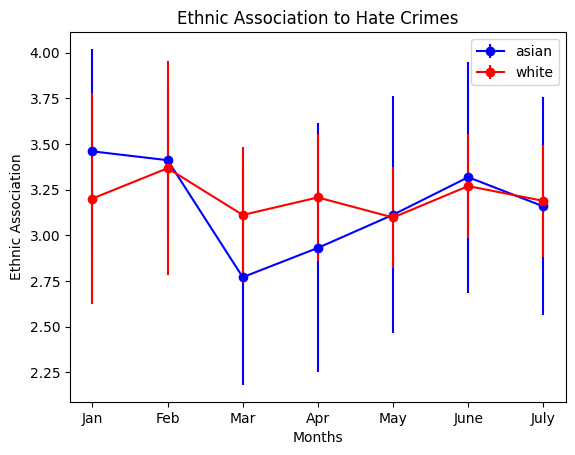

In [70]:
fig, ax = plt.subplots()

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July']

ax.errorbar(x=months, y=np.mean(hateAsian, axis=1), yerr=np.sqrt(np.var(hateAsian,axis=1)), fmt='-o', color='blue', label='asian')
ax.errorbar(x=months, y=np.mean(hateWhite, axis=1), yerr=np.sqrt(np.var(hateWhite,axis=1)), fmt='-o', color='red', label='white')

ax.set_xlabel('Months')
ax.set_ylabel('Ethnic Association')
ax.set_title('Ethnic Association to Hate Crimes')
ax.legend()
plt.show()

### Outsider Adjectives

In [51]:
# Bias with Asian vector
outsiderAsian_jan = np.linalg.norm(outsiderGroup_jan - asianEmb_jan, axis=1)
outsiderAsian_feb = np.linalg.norm(outsiderGroup_feb - asianEmb_feb, axis=1)
outsiderAsian_mar = np.linalg.norm(outsiderGroup_mar - asianEmb_mar, axis=1)
outsiderAsian_apr = np.linalg.norm(outsiderGroup_apr - asianEmb_apr, axis=1)
outsiderAsian_may = np.linalg.norm(outsiderGroup_may - asianEmb_may, axis=1)
outsiderAsian_june = np.linalg.norm(outsiderGroup_june - asianEmb_june, axis=1)
outsiderAsian_july = np.linalg.norm(outsiderGroup_july - asianEmb_july, axis=1)

In [52]:
outsiderAsian = np.array([outsiderAsian_jan, outsiderAsian_feb, outsiderAsian_mar, outsiderAsian_apr, outsiderAsian_may, 
                         outsiderAsian_june, outsiderAsian_july])

In [53]:
# Averages similarity
np.mean(outsiderAsian, axis=1)

array([3.3465667, 3.18851  , 2.5595195, 2.5423303, 2.7739341, 2.7258637,
       2.7752306], dtype=float32)

In [54]:
# Deviation between months 
np.sqrt(np.var(outsiderAsian,axis=1))

array([0.53410727, 0.42643496, 0.65068895, 0.81933504, 0.7613613 ,
       0.7611066 , 0.6827108 ], dtype=float32)

In [55]:
# Bias with White vector
outsiderWhite_jan = np.linalg.norm(outsiderGroup_jan - whiteEmb_jan, axis=1)
outsiderWhite_feb = np.linalg.norm(outsiderGroup_feb - whiteEmb_feb, axis=1)
outsiderWhite_mar = np.linalg.norm(outsiderGroup_mar - whiteEmb_mar, axis=1)
outsiderWhite_apr = np.linalg.norm(outsiderGroup_apr - whiteEmb_apr, axis=1)
outsiderWhite_may = np.linalg.norm(outsiderGroup_may - whiteEmb_may, axis=1)
outsiderWhite_june = np.linalg.norm(outsiderGroup_june - whiteEmb_june, axis=1)
outsiderWhite_july = np.linalg.norm(outsiderGroup_july - whiteEmb_july, axis=1)

In [56]:
outsiderWhite = np.array([outsiderWhite_jan, outsiderWhite_feb, outsiderWhite_mar, outsiderWhite_apr, outsiderWhite_may,
                         outsiderWhite_june, outsiderWhite_july])

In [57]:
# Average similarity
np.mean(outsiderWhite, axis=1)

array([2.9854283, 3.139901 , 2.7674127, 2.795471 , 2.7411025, 2.7798333,
       2.825604 ], dtype=float32)

In [58]:
# Deviation between months 
np.sqrt(np.var(outsiderWhite,axis=1))

array([0.58345926, 0.5716771 , 0.3595542 , 0.32222846, 0.22790548,
       0.29133943, 0.3146596 ], dtype=float32)

#### Plots

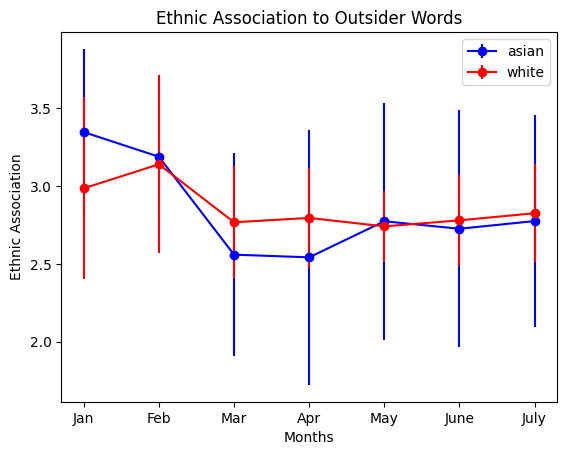

In [68]:
fig, ax = plt.subplots()

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July']

ax.errorbar(x=months, y=np.mean(outsiderAsian, axis=1), yerr=np.sqrt(np.var(outsiderAsian,axis=1)), fmt='-o', color='blue', label='asian')
ax.errorbar(x=months, y=np.mean(outsiderWhite, axis=1), yerr=np.sqrt(np.var(outsiderWhite,axis=1)), fmt='-o', color='red', label='white')

ax.set_xlabel('Months')
ax.set_ylabel('Ethnic Association')
ax.set_title('Ethnic Association to Outsider Words')
ax.legend()
plt.show()

## Embedding Bias

We calculate the average embedding bias by computing the following for every category:
$$\mu_{\text{white}} - \mu_{\text{asian}}$$

where $\mu_{\text{white}}$ represents the average association of words in a category to white last names and $\mu_{\text{asian}}$ represents the average association of words in a category to asian last names.

### COVID 

In [60]:
# Average embedding bias
covid_bias = np.mean(covidWhite, axis=1) - np.mean(covidAsian, axis=1)

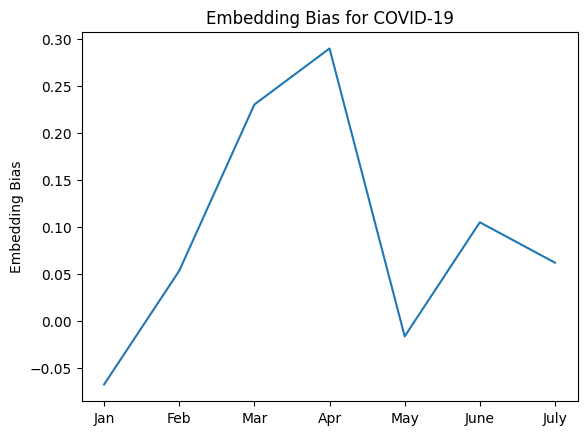

In [61]:
plt.plot(months, covid_bias)
plt.ylabel('Embedding Bias')
plt.title('Embedding Bias for COVID-19')

plt.show()

### Hate Crime Words 

In [62]:
# Average embedding bias
hate_bias = np.mean(hateWhite, axis=1) - np.mean(hateAsian, axis=1)

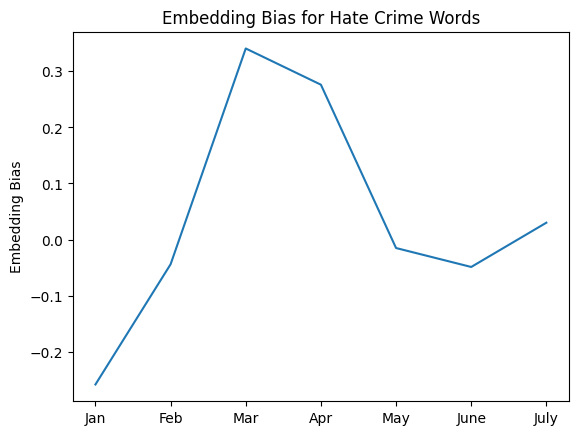

In [63]:
plt.plot(months, hate_bias)
plt.ylabel('Embedding Bias')
plt.title('Embedding Bias for Hate Crime Words')

plt.show()

### Outsider Adjectives

In [64]:
# Average embedding bias
outsider_bias = np.mean(outsiderWhite, axis=1) - np.mean(outsiderAsian, axis=1)

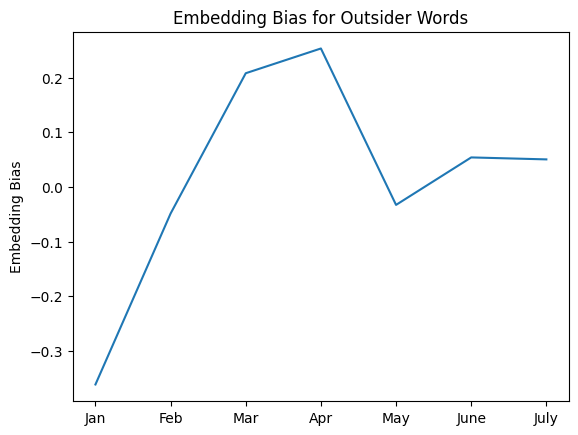

In [65]:
plt.plot(months, outsider_bias)
plt.ylabel('Embedding Bias')
plt.title('Embedding Bias for Outsider Words')

plt.show()